<a href="https://colab.research.google.com/github/catadurian/DataScienceII/blob/main/ProyectoDSParteI_Durian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Final - Parte I

## Abstract

El presente proyecto de análisis de datos tiene como objetivo identificar patrones y posibles anomalías en indicadores de calidad educativa a nivel global utilizando técnicas de análisis visual y modelos de detección automática de anomalías. Se utiliza el dataset “Global Data Set on Education Quality (1965–2015)” publicado por Altinok, Angrist y Patrinos (2018), el cual contiene información por país y año sobre el desempeño educativo.

Se analiza el período 2000–2015 en 158 países, aplicando visualizaciones univariadas, bivariadas y multivariadas, y una simulación de detección de anomalías basada en variaciones abruptas. Se busca resaltar años y países con comportamiento educativo inusual, con potencial implicancia para el análisis de políticas públicas.

El análisis incluye limpieza de datos, identificación de valores faltantes y un pipeline básico que puede ser adaptado para utilizar APIs de detección como Oracle Anomaly Detection.

---


## Preguntas de investigación

1. ¿Qué países muestran un desempeño educativo significativamente distinto al promedio global durante el período 2000–2015?
2. ¿Existen cambios abruptos en el rendimiento promedio o en la distribución de estudiantes por nivel que sugieran eventos críticos?
3. ¿Cuáles son los países con mayor variabilidad en los logros educativos a lo largo del tiempo?

## Hipótesis

- **H1:** Los países con tasas consistentemente bajas de estudiantes en niveles intermedio y avanzado presentan mayor frecuencia de anomalías.
- **H2:** Las anomalías tienden a concentrarse en períodos de crisis económicas o reformas educativas intensas.
- **H3:** Existe una correlación positiva entre el puntaje promedio de aprendizaje y el porcentaje de estudiantes que alcanzan el umbral avanzado.


In [4]:
# Cargar archivo
from google.colab import files
uploaded = files.upload()

Saving Global Data Set on Education Quality (1965-2015) - Altinok, Angrist, and Patrinos (2018).csv to Global Data Set on Education Quality (1965-2015) - Altinok, Angrist, and Patrinos (2018) (1).csv


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("Global Data Set on Education Quality (1965-2015) - Altinok, Angrist, and Patrinos (2018).csv")





# Renombrar columnas
df.columns = [
    "country", "year",
    "avg_learning_score",
    "min_threshold_pct",
    "intermediate_threshold_pct",
    "advanced_threshold_pct"
]

# Eliminar filas con valores nulos
df_clean = df.dropna(subset=[
    "avg_learning_score",
    "min_threshold_pct",
    "intermediate_threshold_pct",
    "advanced_threshold_pct"
])


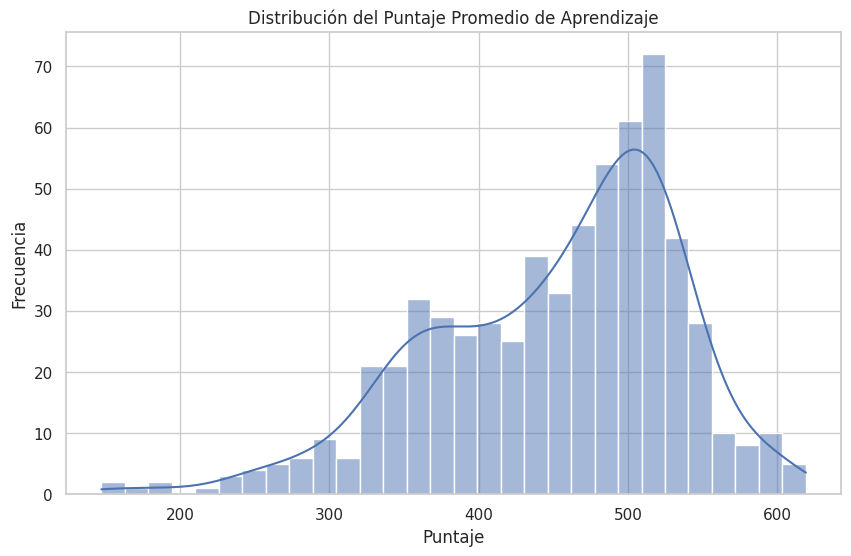

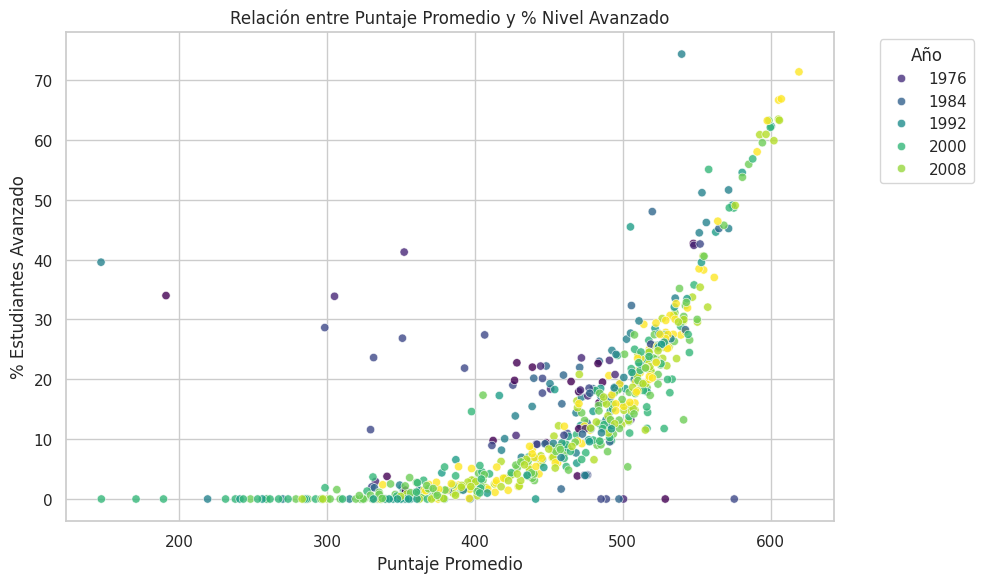

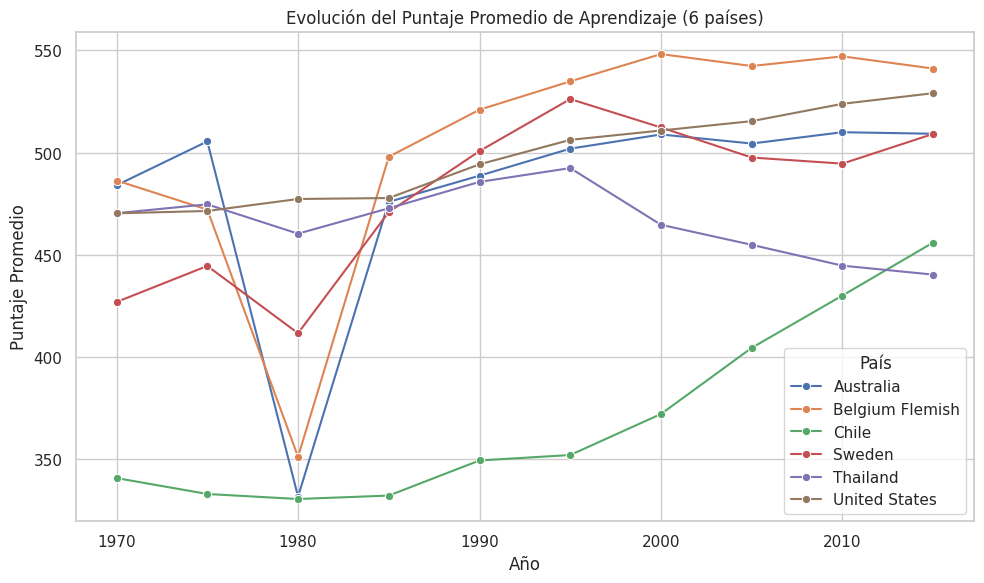

In [10]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(df_clean["avg_learning_score"], kde=True, bins=30)
plt.title("Distribución del Puntaje Promedio de Aprendizaje")
plt.xlabel("Puntaje")
plt.ylabel("Frecuencia")
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_clean,
    x="avg_learning_score",
    y="advanced_threshold_pct",
    hue="year",
    palette="viridis",
    alpha=0.8
)
plt.title("Relación entre Puntaje Promedio y % Nivel Avanzado")
plt.xlabel("Puntaje Promedio")
plt.ylabel("% Estudiantes Avanzado")
plt.legend(title="Año", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

top_countries = df_clean["country"].value_counts().head(6).index
df_subset = df_clean[df_clean["country"].isin(top_countries)]

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df_subset,
    x="year",
    y="avg_learning_score",
    hue="country",
    marker="o"
)
plt.title("Evolución del Puntaje Promedio de Aprendizaje (6 países)")
plt.xlabel("Año")
plt.ylabel("Puntaje Promedio")
plt.legend(title="País")
plt.tight_layout()
plt.show()


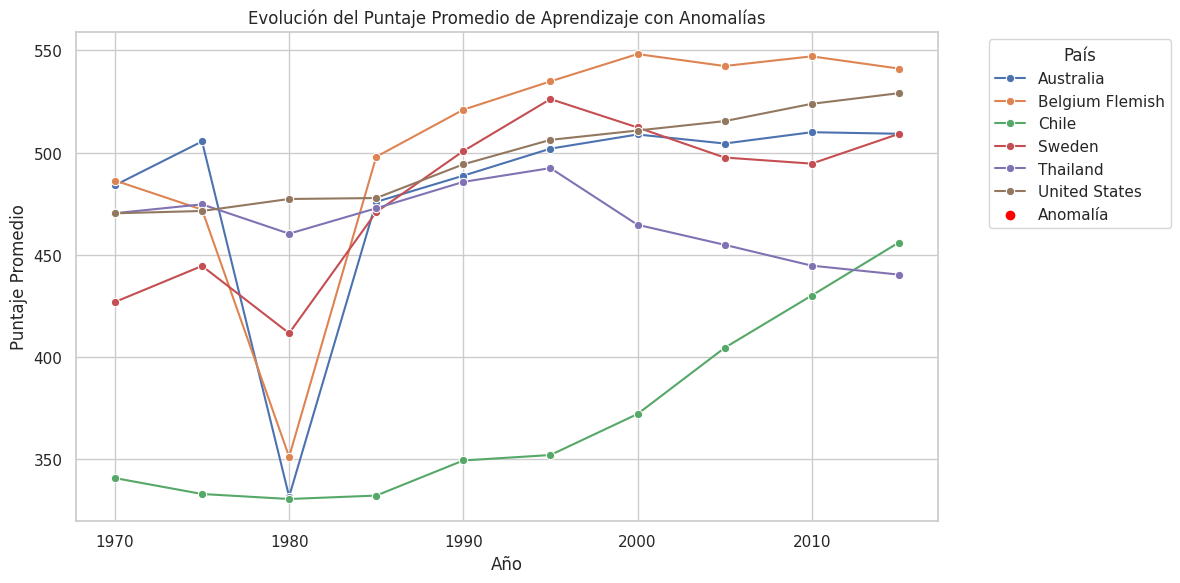

In [11]:
df_anomaly = df_clean.sort_values(by=["country", "year"]).copy()
df_anomaly["score_diff"] = df_anomaly.groupby("country")["avg_learning_score"].diff().abs()
df_anomaly["anomaly_score"] = df_anomaly["score_diff"] / df_anomaly["score_diff"].max()
df_anomaly["is_anomaly"] = df_anomaly["anomaly_score"] > 0.6

# Visualización con anomalías marcadas
plt.figure(figsize=(12, 6))
top_countries = df_anomaly["country"].value_counts().head(6).index
df_subset = df_anomaly[df_anomaly["country"].isin(top_countries)]

sns.lineplot(
    data=df_subset,
    x="year",
    y="avg_learning_score",
    hue="country",
    marker="o"
)

anomalous_points = df_subset[df_subset["is_anomaly"] == True]
plt.scatter(
    anomalous_points["year"],
    anomalous_points["avg_learning_score"],
    color="red",
    label="Anomalía",
    zorder=5
)

plt.title("Evolución del Puntaje Promedio de Aprendizaje con Anomalías")
plt.xlabel("Año")
plt.ylabel("Puntaje Promedio")
plt.legend(title="País", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
